## Pandas
* filtering
* sorting
* usefull methods
* groupby
* merge

In [32]:
import pandas as pd
from datetime import datetime

# Define the data as a list of dictionaries with 10 student records
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Mathematics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Computer Science', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'physics', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df : pd.DataFrame = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Show the DataFrame
display(students_df)

# Verify the data types
display(students_df.info())

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Mathematics,2023-04-10,13000
4,5,Eva,John,Computer Science,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,physics,2023-10-05,19000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            10 non-null     int64         
 1   name               10 non-null     object        
 2   father             10 non-null     object        
 3   course             10 non-null     object        
 4   date_of_admission  10 non-null     datetime64[ns]
 5   fee                10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 612.0+ bytes


None

In [36]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1) # greather than and equal to 1
    name: Series[str] = pa.Field(nullable=False) 
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Validate the DataFrame
validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    Physics        2023-04-10  13000
4        5     Eva     John    physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


## apply the filter or filter functions on dataframe

In [9]:
students_df.head(1)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


In [10]:
students_df.course.value_counts()

course
Physics             1
Chemistry           1
Biology             1
Mathematics         1
Computer Science    1
Economics           1
History             1
Geography           1
English             1
Art                 1
Name: count, dtype: int64

In [11]:
students_df.course.value_counts(dropna=False)# also counts null cells values

course
Physics             1
Chemistry           1
Biology             1
Mathematics         1
Computer Science    1
Economics           1
History             1
Geography           1
English             1
Art                 1
Name: count, dtype: int64

In [12]:
students_df.course.value_counts(dropna=False,normalize=True)# normalize will calculate percentage

course
Physics             0.1
Chemistry           0.1
Biology             0.1
Mathematics         0.1
Computer Science    0.1
Economics           0.1
History             0.1
Geography           0.1
English             0.1
Art                 0.1
Name: proportion, dtype: float64

In [13]:
students_df.course.value_counts(dropna=False,normalize=True)*100

course
Physics             10.0
Chemistry           10.0
Biology             10.0
Mathematics         10.0
Computer Science    10.0
Economics           10.0
History             10.0
Geography           10.0
English             10.0
Art                 10.0
Name: proportion, dtype: float64

In [14]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Mathematics,2023-04-10,13000
4,5,Eva,John,Computer Science,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [16]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a seed for reproducibility
np.random.seed(0)

# Define the number of transactions
num_transactions = 1000

# Generate random dates within the current year
current_year = datetime.now().year
start_date = datetime(current_year, 1, 1)
end_date = datetime.now()

# Generate a list of random dates within the year
random_dates = [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
                for _ in range(num_transactions)]

# Generate a list of random fee amounts
random_fees = np.random.randint(low=1, high=5000, size=num_transactions)

# Create the DataFrame
fee_transactions = pd.DataFrame({
    'date': random_dates,
    'fee': random_fees
})

# Sort by date for readability
fee_transactions.sort_values('date', inplace=True)

# Reset index after sorting
fee_transactions.reset_index(drop=True, inplace=True)

print(fee_transactions)



          date   fee
0   2023-01-01  1629
1   2023-01-01  2404
2   2023-01-01  1822
3   2023-01-01   877
4   2023-01-03  1605
..         ...   ...
995 2023-11-26  4275
996 2023-11-27  3005
997 2023-11-27  1507
998 2023-11-28  4364
999 2023-11-28  4178

[1000 rows x 2 columns]


In [17]:
fd : pd.DataFrame = pd.DataFrame(fee_transactions)
fd

,date,fee
0,2023-01-01,1629
1,2023-01-01,2404
2,2023-01-01,1822
3,2023-01-01,877
4,2023-01-03,1605
...,...,...
995,2023-11-26,4275
996,2023-11-27,3005
997,2023-11-27,1507
998,2023-11-28,4364


In [13]:
pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000])

0      (1000, 3000]
1      (1000, 3000]
2      (1000, 3000]
3       (500, 1000]
4      (1000, 3000]
           ...     
995    (4000, 5000]
996    (3000, 4000]
997    (1000, 3000]
998    (4000, 5000]
999    (4000, 5000]
Name: fee, Length: 1000, dtype: category
Categories (5, interval[int64, right]): [(1, 500] < (500, 1000] < (1000, 3000] < (3000, 4000] < (4000, 5000]]

In [19]:
pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000]).value_counts()

fee
(1000, 3000]    421
(3000, 4000]    202
(4000, 5000]    195
(1, 500]        109
(500, 1000]      73
Name: count, dtype: int64

In [21]:
pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000]).value_counts(normalize=True)*100

fee
(1000, 3000]    42.1
(3000, 4000]    20.2
(4000, 5000]    19.5
(1, 500]        10.9
(500, 1000]      7.3
Name: proportion, dtype: float64

In [22]:
pd.qcut(fee_transactions.fee, [0.3,.5, .7, .9, 1])

0      (1543.3990000000001, 2434.5]
1      (1543.3990000000001, 2434.5]
2      (1543.3990000000001, 2434.5]
3                               NaN
4      (1543.3990000000001, 2434.5]
                   ...             
995                (3544.9, 4455.6]
996                (2434.5, 3544.9]
997                             NaN
998                (3544.9, 4455.6]
999                (3544.9, 4455.6]
Name: fee, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(1543.3990000000001, 2434.5] < (2434.5, 3544.9] < (3544.9, 4455.6] < (4455.6, 4998.0]]

In [23]:
pd.qcut(fee_transactions.fee, [0.3,.5, .7, .9, 1]).value_counts()

fee
(1543.3990000000001, 2434.5]    200
(2434.5, 3544.9]                200
(3544.9, 4455.6]                200
(4455.6, 4998.0]                100
Name: count, dtype: int64

In [25]:
pd.qcut(fee_transactions.fee, [0.3,.5, .7, .9, 1]).value_counts(normalize=True)*100

fee
(1543.3990000000001, 2434.5]    28.571429
(2434.5, 3544.9]                28.571429
(3544.9, 4455.6]                28.571429
(4455.6, 4998.0]                14.285714
Name: proportion, dtype: float64

# filter on columns
* & , | , ~

* Syntax:
      dataframe[(dataframe.column1=='value1') & (dataframe.column2=='value2)]
* string columns
* numeric columns
* datetime columns

In [15]:
students_df.head(10)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Mathematics,2023-04-10,13000
4,5,Eva,John,Computer Science,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [16]:
students_df['course'] == "Physics"


0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [17]:
students_df[students_df['course'] == "Physics"]


,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


In [18]:
students_df['course'] == "physics"

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [19]:
students_df['course'].str.lower() == "physics"

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [20]:
students_df[students_df['course'].str.lower() == "physics"]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


In [40]:
students_df['course'].str.lower().str.contains('cs')

0     True
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [21]:
students_df[students_df['course'].str.lower().str.contains('cs')]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,Mathematics,2023-04-10,13000
5,6,Frank,Tom,Economics,2023-06-21,15000


In [22]:
students_df[(students_df['course'].str.lower().str.contains('cs')) & (students_df['fee']>= 14000 )]

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


In [23]:
(students_df['course'].str.lower().str.contains('cs')) & (students_df['course'].str.lower().str.contains('r') )

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [24]:
students_df[(students_df['course'].str.lower().str.contains('cs')) & (students_df['course'].str.lower().str.contains('r') )]

,roll_no,name,father,course,date_of_admission,fee


In [25]:
(students_df['course'].str.lower().str.contains('cs')) | (students_df['course'].str.lower().str.contains('r') )

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8    False
9     True
Name: course, dtype: bool

In [26]:
students_df[(students_df['course'].str.lower().str.contains('cs')) | (students_df['course'].str.lower().str.contains('r') )]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
3,4,David,Rick,Mathematics,2023-04-10,13000
4,5,Eva,John,Computer Science,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
9,10,Jack,Noah,Art,2023-10-05,19000


In [28]:
students_df['date_of_admission']

0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: date_of_admission, dtype: datetime64[ns]

In [53]:
[i for i in dir(students_df['date_of_admission'].dt) if "_" not in i]

['ceil',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'tz',
 'unit',
 'weekday',
 'year']

In [56]:
students_df['date_of_admission'].dt.year
students_df['date_of_admission'].dt.month
students_df['date_of_admission'].dt.day
students_df['date_of_admission'].dt.weekday
students_df['date_of_admission'].dt.day_of_week
students_df['date_of_admission'].dt.hour
students_df['date_of_admission'].dt.minute
students_df['date_of_admission'].dt.second
students_df['date_of_admission'].dt.microsecond
students_df['date_of_admission'].dt.tz
students_df['date_of_admission'].dt.tz_localize
students_df['date_of_admission'].dt.tz_convert
students_df['date_of_admission'].dt.tz_localize(None)

0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: date_of_admission, dtype: datetime64[ns]

In [57]:
from datetime import datetime

date : datetime = datetime.now()
date

datetime.datetime(2023, 11, 29, 16, 40, 59, 916926)

In [58]:
s1 : pd.Series = pd.Series([date])
s1

0   2023-11-29 16:40:59.916926
dtype: datetime64[ns]

In [59]:
s1.dt.strftime("%Y/%m %d %I %b %B") # convet from date to text 

0    2023/11 29 04 Nov November
dtype: object

In [60]:
s2 :pd.Series =  pd.Series(['01 Nov 2023', '01 Nov 2024', '01 Jan 2022'])
s2

0    01 Nov 2023
1    01 Nov 2024
2    01 Jan 2022
dtype: object

In [61]:
s2.apply(lambda x: datetime.strptime(x,"%d %b %Y") ) # string to datetime

0   2023-11-01
1   2024-11-01
2   2022-01-01
dtype: datetime64[ns]

## Group by
* dataframe.groupby(['column1', 'column2'])
* dataframe.groupby(['column1', 'column2'])[['co1','col2']].aggregate([min,max])
* dataframe.groupby(['column1', 'column2'])[['co1','col2']].apply(function())

In [3]:
students_df.groupby(["course"])

In [4]:
list(students_df.groupby(["course"]))

[(('Art',),
     roll_no  name father course date_of_admission    fee
  9       10  Jack   Noah    Art        2023-10-05  19000),
 (('Biology',),
     roll_no   name father   course date_of_admission    fee
  2        3  Chloe    Tim  Biology        2023-03-14  12000),
 (('Chemistry',),
     roll_no   name father     course date_of_admission    fee
  1        2  Brian  Steve  Chemistry        2023-02-12  11000),
 (('Computer Science',),
     roll_no name father            course date_of_admission    fee
  4        5  Eva   John  Computer Science        2023-05-16  14000),
 (('Economics',),
     roll_no   name father     course date_of_admission    fee
  5        6  Frank    Tom  Economics        2023-06-21  15000),
 (('English',),
     roll_no    name  father   course date_of_admission    fee
  8        9  Isabel  Oliver  English        2023-09-10  18000),
 (('Geography',),
     roll_no   name   father     course date_of_admission    fee
  7        8  Henry  Charles  Geography        2

In [5]:
list(students_df.groupby(["course"]))[0]

(('Art',),
    roll_no  name father course date_of_admission    fee
 9       10  Jack   Noah    Art        2023-10-05  19000)

In [6]:
list(students_df.groupby(["course"]))[0][0]

('Art',)

In [9]:
list(students_df.groupby(["course"]))[0][1]

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


In [13]:
for group in list(students_df.groupby(['course'])):
    display(group[0])
   
    print('================================')

('Art',)

('Biology',)

('Chemistry',)

('Computer Science',)

('Economics',)

('English',)

('Geography',)

('History',)

('Mathematics',)

('Physics',)

In [14]:
for group in list(students_df.groupby(['course'])):
    display(group[0])
    display(group[1])
    print('================================')

('Art',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('Biology',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('Chemistry',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('Computer Science',)

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Computer Science,2023-05-16,14000


('Economics',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('English',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


('Geography',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('History',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('Mathematics',)

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,Mathematics,2023-04-10,13000


('Physics',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


In [18]:
students_df.groupby([students_df['date_of_admission'].dt.strftime("%B")])

In [19]:
students_df.groupby([students_df['date_of_admission'].dt.strftime("%B"),students_df['course']])

In [17]:
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime("%B")])):
    display(group[0])
    display(group[1])
    print('================================')

('April',)

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,Mathematics,2023-04-10,13000


('August',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May',)

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Computer Science,2023-05-16,14000


('October',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [20]:
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime("%B"),students_df['course']])):
    display(group[0])
    display(group[1])
    print('================================')

('April', 'Mathematics')

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,Mathematics,2023-04-10,13000


('August', 'Geography')

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February', 'Chemistry')

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July', 'History')

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June', 'Economics')

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March', 'Biology')

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May', 'Computer Science')

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Computer Science,2023-05-16,14000


('October', 'Art')

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September', 'English')

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [21]:
students_df.groupby(['course']).aggregate('count')

,roll_no,name,father,date_of_admission,fee
course,,,,,
Art,1,1,1,1,1
Biology,1,1,1,1,1
Chemistry,1,1,1,1,1
Computer Science,1,1,1,1,1
Economics,1,1,1,1,1
English,1,1,1,1,1
Geography,1,1,1,1,1
History,1,1,1,1,1
Mathematics,1,1,1,1,1


In [29]:
students_df.groupby(['course'])[['fee']].aggregate('count')

,fee
course,
Art,1
Biology,1
Chemistry,1
Computer Science,1
Economics,1
English,1
Geography,1
History,1
Mathematics,1


In [24]:
students_df.groupby(['course'])[['fee']].aggregate([len,max,min])

C:\Users\DELL\AppData\Local\Temp\ipykernel_1140\132462404.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course'])[['fee']].aggregate([len,max,min])
C:\Users\DELL\AppData\Local\Temp\ipykernel_1140\132462404.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course'])[['fee']].aggregate([len,max,min])


fee              
                 len    max    min
course                            
Art                1  19000  19000
Biology            1  12000  12000
Chemistry          1  11000  11000
Computer Science   1  14000  14000
Economics          1  15000  15000
English            1  18000  18000
Geography          1  17000  17000
History            1  16000  16000
Mathematics        1  13000  13000
Physics            1  10000  10000

In [25]:
students_df.groupby(['course',students_df['date_of_admission'].dt.strftime("%B")])[['fee']].aggregate([len,max,min])

C:\Users\DELL\AppData\Local\Temp\ipykernel_1140\2007980083.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course',students_df['date_of_admission'].dt.strftime("%B")])[['fee']].aggregate([len,max,min])
C:\Users\DELL\AppData\Local\Temp\ipykernel_1140\2007980083.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course',students_df['date_of_admission'].dt.strftime("%B")])[['fee']].aggregate([len,max,min])


fee              
                                   len    max    min
course           date_of_admission                  
Art              October             1  19000  19000
Biology          March               1  12000  12000
Chemistry        February            1  11000  11000
Computer Science May                 1  14000  14000
Economics        June                1  15000  15000
English          September           1  18000  18000
Geography        August              1  17000  17000
History          July                1  16000  16000
Mathematics      April               1  13000  13000
Physics          January             1  10000  10000

In [29]:
students_df.groupby(['course']).apply(lambda x: x.head())

,,roll_no,name,father,course,date_of_admission,fee
course,,,,,,,
Art,9,10,Jack,Noah,Art,2023-10-05,19000
Biology,2,3,Chloe,Tim,Biology,2023-03-14,12000
Chemistry,1,2,Brian,Steve,Chemistry,2023-02-12,11000
Computer Science,4,5,Eva,John,Computer Science,2023-05-16,14000
Economics,5,6,Frank,Tom,Economics,2023-06-21,15000
English,8,9,Isabel,Oliver,English,2023-09-10,18000
Geography,7,8,Henry,Charles,Geography,2023-08-17,17000
History,6,7,Grace,Harry,History,2023-07-25,16000
Mathematics,3,4,David,Rick,Mathematics,2023-04-10,13000


In [30]:
students_df.groupby(['course']).apply(lambda x: x.head(1)) # head(1) will contain only one data of course

,,roll_no,name,father,course,date_of_admission,fee
course,,,,,,,
Art,9,10,Jack,Noah,Art,2023-10-05,19000
Biology,2,3,Chloe,Tim,Biology,2023-03-14,12000
Chemistry,1,2,Brian,Steve,Chemistry,2023-02-12,11000
Computer Science,4,5,Eva,John,Computer Science,2023-05-16,14000
Economics,5,6,Frank,Tom,Economics,2023-06-21,15000
English,8,9,Isabel,Oliver,English,2023-09-10,18000
Geography,7,8,Henry,Charles,Geography,2023-08-17,17000
History,6,7,Grace,Harry,History,2023-07-25,16000
Mathematics,3,4,David,Rick,Mathematics,2023-04-10,13000


In [4]:
!pip install matplotlib

  Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.45.1-cp312-cp312-win_amd64.whl.metadata (158 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached Pillow-10.1.0-cp312-cp312-win_amd64.whl.metadata (9.6 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 217.9 kB/s eta 0:00:35
   ---------------------------------------- 0.0/7.6 MB 217.9 kB/s eta 0:00:35
   ---------------------------------------- 0.1/7.6 MB 301.2 k

<Axes: xlabel='course'>

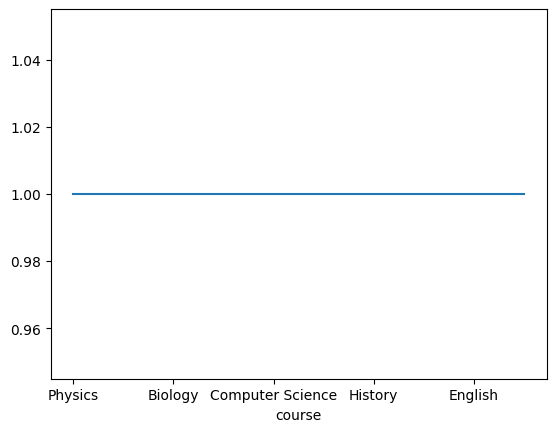

In [33]:
students_df.course.value_counts().plot()

<Axes: xlabel='course'>

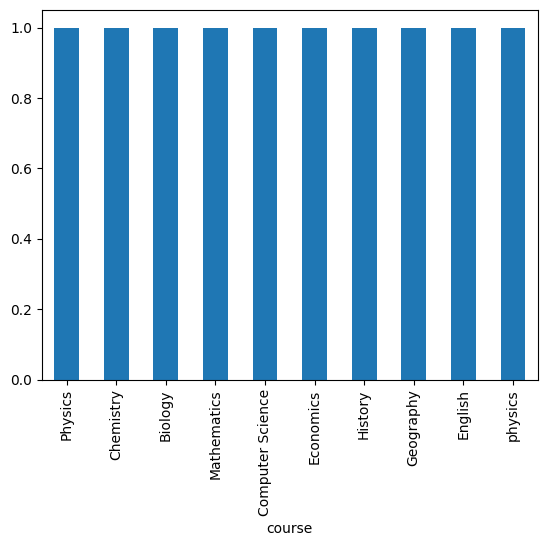

In [34]:
students_df.course.value_counts().plot(kind= "bar")

<Axes: ylabel='proportion'>

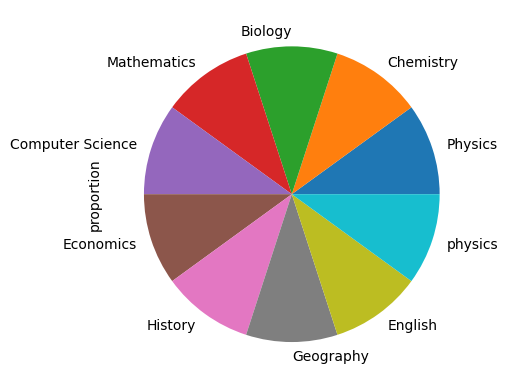

In [35]:
students_df.course.value_counts(normalize=True).plot(kind='pie')

C:\Users\DELL\AppData\Local\Temp\ipykernel_10332\3496716602.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min,max,np.mean]).plot(kind="bar")
C:\Users\DELL\AppData\Local\Temp\ipykernel_10332\3496716602.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min,max,np.mean]).plot(kind="bar")
C:\Users\DELL\AppData\Local\Temp\ipykernel_10332\3496716602.py:2: FutureWarning: The provided callable <function mean at 0x000001DA1F6DFEC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided call

<Axes: xlabel='course'>

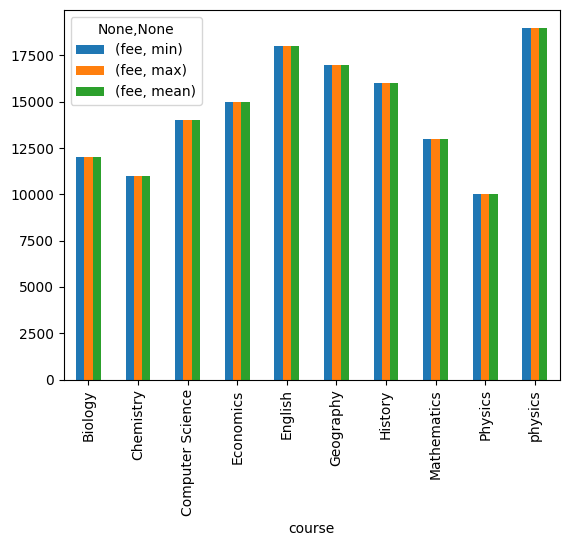

In [41]:
import numpy as np
students_df.groupby(['course'])[['fee']].aggregate([min,max,np.mean]).plot(kind="bar")

# Data Wraggling
* .merge
* .join
* pd.concat([df1,df2])
# joining
* left join,
* right join
* inner join
* outer join
* cross join

https://www.w3schools.com/sql/sql_join.asp

In [42]:
import pandas as pd
from typing import Dict, Union, List, Iterator

from collections.abc import Iterator

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 102]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'teacher_id': [101, 102, 103],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [43]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,102


In [44]:
teachers

,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [45]:
student_fees

,student_id,fee_paid
0,1,1500
1,2,1500
2,3,1500
3,4,1500
4,5,1500


# joining columns properties
* same pattern of both columns

* same data types of both columns

* name can be different (columns)

# Merg

* on
* left_on
* right_on
* left_index=True
* bright_index=True
* how
     * joining types
     * left
     * right
     * inner
     * outer
     * cross

In [46]:
display(students)
display(teachers)

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,102


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [47]:
d1 : pd.DataFrame = pd.merge(students,teachers)
d1

,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson
3,5,Eva,102,Chem,Ms. Johnson
4,3,Charlie,103,Maths,Dr. Lee


In [48]:
display(students)
display(teachers)

d1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id")
print("Result")
d1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,102


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson
3,5,Eva,102,Chem,Ms. Johnson
4,3,Charlie,103,Maths,Dr. Lee


In [50]:
d2 : pd.DataFrame = pd.merge(students, teachers, student_fees) #only apply in two data
d2

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [51]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'teacher_id': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [53]:
display(students)
display(teachers)

df3 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id")
print("Result")
df3 #this is inner join

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson


In [54]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='inner') #by default inner
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson


In [55]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='left') #by default inner
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,2,Bob,102,Chem,Ms. Johnson
2,3,Charlie,103,NaN,NaN
3,4,David,101,Physics,Mr. Smith
4,5,Eva,500,NaN,NaN


In [59]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, how='right') #by default inner
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1.0,Alice,101,Physics,Mr. Smith
1,4.0,David,101,Physics,Mr. Smith
2,2.0,Bob,102,Chem,Ms. Johnson
3,NaN,NaN,100,Maths,Dr. Lee


In [57]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='outer') #by default inner
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1.0,Alice,101,Physics,Mr. Smith
1,4.0,David,101,Physics,Mr. Smith
2,2.0,Bob,102,Chem,Ms. Johnson
3,3.0,Charlie,103,NaN,NaN
4,5.0,Eva,500,NaN,NaN
5,NaN,NaN,100,Maths,Dr. Lee


In [60]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers , how='cross')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id_x,teacher_id_y,course_name,teacher_name
0,1,Alice,101,101,Physics,Mr. Smith
1,1,Alice,101,102,Chem,Ms. Johnson
2,1,Alice,101,100,Maths,Dr. Lee
3,2,Bob,102,101,Physics,Mr. Smith
4,2,Bob,102,102,Chem,Ms. Johnson
5,2,Bob,102,100,Maths,Dr. Lee
6,3,Charlie,103,101,Physics,Mr. Smith
7,3,Charlie,103,102,Chem,Ms. Johnson
8,3,Charlie,103,100,Maths,Dr. Lee
9,4,David,101,101,Physics,Mr. Smith


# if column name change in both dataframe


In [61]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'tid': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [62]:
display(students)
display(teachers)

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,tid,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


In [63]:
display(students)
display(teachers)

#                             left       right
df1 : pd.DataFrame = pd.merge(students, teachers, 
                              left_on="teacher_id",
                              right_on="tid",
                              how='inner')
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,tid,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


,student_id,name,teacher_id,tid,course_name,teacher_name
0,1,Alice,101,101,Physics,Mr. Smith
1,4,David,101,101,Physics,Mr. Smith
2,2,Bob,102,102,Chem,Ms. Johnson


In [64]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'tid': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 2, 1, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [65]:
display(student_fees)

,student_id,fee_paid
0,1,1500
1,2,1500
2,2,1500
3,1,1500
4,5,1500


In [66]:
d4: pd.DataFrame = student_fees.groupby("student_id").agg('sum')
d4

,fee_paid
student_id,
1,3000
2,3000
5,1500


In [67]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


In [71]:
d5 : pd.DataFrame = pd.merge(students,d4, left_on="student_id",
                                right_index=True,how="outer")
d5

,student_id,name,teacher_id,fee_paid
0,1,Alice,101,3000.0
1,2,Bob,102,3000.0
2,3,Charlie,103,NaN
3,4,David,101,NaN
4,5,Eva,500,1500.0


In [72]:
pd.concat([students, teachers, student_fees])# axis=0 #default value

,student_id,name,teacher_id,tid,course_name,teacher_name,fee_paid
0,1.0,Alice,101.0,NaN,NaN,NaN,NaN
1,2.0,Bob,102.0,NaN,NaN,NaN,NaN
2,3.0,Charlie,103.0,NaN,NaN,NaN,NaN
3,4.0,David,101.0,NaN,NaN,NaN,NaN
4,5.0,Eva,500.0,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,101.0,Physics,Mr. Smith,NaN
1,NaN,NaN,NaN,102.0,Chem,Ms. Johnson,NaN
2,NaN,NaN,NaN,100.0,Maths,Dr. Lee,NaN
0,1.0,NaN,NaN,NaN,NaN,NaN,1500.0
1,2.0,NaN,NaN,NaN,NaN,NaN,1500.0


In [73]:
pd.concat([students, teachers, student_fees], axis=1)

,student_id,name,teacher_id,tid,course_name,teacher_name,student_id,fee_paid
0,1,Alice,101,101.0,Physics,Mr. Smith,1,1500
1,2,Bob,102,102.0,Chem,Ms. Johnson,2,1500
2,3,Charlie,103,100.0,Maths,Dr. Lee,2,1500
3,4,David,101,NaN,NaN,NaN,1,1500
4,5,Eva,500,NaN,NaN,NaN,5,1500
